# SMC & SMC'

In [1]:
# Import packages.
import copy
import matplotlib
from matplotlib import pyplot as plt
import msprime
import numpy as np
import pandas as pd
import smclib
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('msprime', msprime.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
# Intialize the matplolib styling.
plt.rcParams.update({
    'figure.constrained_layout.use': True,
    'figure.facecolor': 'white',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
})

matplotlib 3.5.3
msprime 1.2.0
numpy 1.26.0
pandas 1.5.3


## Generate Simulated Data
Theoretically, you only need to do this once...
### Number of Recombination Events

In [2]:
# Intialize an lisy of populuation recombination rate values.
R_rhos = np.array([0.1, 1, 10, 100, 1_000])
# Intialize a dictionary to store the receombination event results.
recomb_dicc = {
    'standard':       {},
    'msp_smc':        {},
    'djp_smc':        {},
    'msp_smc_prime':  {},
    'djp_smc_prime':  {},
}
# For every population recombination rate.
for i, rho in enumerate(R_rhos):
    # Intialize lists to store the results.
    recomb_dicc['standard'][rho]      = []
    recomb_dicc['msp_smc'][rho]       = []
    recomb_dicc['djp_smc'][rho]       = []
    recomb_dicc['msp_smc_prime'][rho] = []
    recomb_dicc['djp_smc_prime'][rho] = []
    # Assuming Ne = 1, compute r.
    r = rho / 4
    # For 1000 replicate simulations.
    for _ in range(1000):
        # Simulate tree-sequences.
        ts_standard      = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_msp_smc       = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            model='smc',
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_msp_smc_prime = msprime.sim_ancestry(
            samples=[msprime.SampleSet(2, ploidy=1)],
            population_size=1,
            ploidy=2,
            recombination_rate=r,
            sequence_length=1,
            model='smc_prime',
            record_full_arg=True,
            discrete_genome=False,
        )
        ts_djp_smc       = smclib.sim_smc(k=2, Ne=1, rho=rho, ploidy=2)
        ts_djp_smc_prime = smclib.sim_smc_prime(k=2, Ne=1, rho=rho, ploidy=2)
        # Update the dictionary.
        recomb_dicc['standard'][rho].append(smclib.R_g_arg(ts_standard))
        recomb_dicc['msp_smc'][rho].append(smclib.R_g_arg(ts_msp_smc))
        recomb_dicc['djp_smc'][rho].append(smclib.R_arg_dicc(ts_djp_smc))
        recomb_dicc['msp_smc_prime'][rho].append(smclib.R_g_arg(ts_msp_smc_prime))
        recomb_dicc['djp_smc_prime'][rho].append(smclib.R_arg_dicc(ts_djp_smc_prime))

In [3]:
for i in recomb_dicc:
    for j in recomb_dicc[i]:
        print(i, j, np.array(recomb_dicc[i][j]).mean(), len(recomb_dicc[i][j]))

standard 0.1 0.136 1000
standard 1.0 1.444 1000
standard 10.0 18.565 1000
standard 100.0 560.246 1000
standard 1000.0 25990.222 1000
msp_smc 0.1 0.094 1000
msp_smc 1.0 1.068 1000
msp_smc 10.0 10.954 1000
msp_smc 100.0 113.753 1000
msp_smc 1000.0 1138.026 1000
djp_smc 0.1 0.089 1000
djp_smc 1.0 1.035 1000
djp_smc 10.0 9.906 1000
djp_smc 100.0 100.358 1000
djp_smc 1000.0 1001.153 1000
msp_smc_prime 0.1 0.137 1000
msp_smc_prime 1.0 1.367 1000
msp_smc_prime 10.0 13.838 1000
msp_smc_prime 100.0 142.393 1000
msp_smc_prime 1000.0 1446.016 1000
djp_smc_prime 0.1 0.083 1000
djp_smc_prime 1.0 0.976 1000
djp_smc_prime 10.0 10.25 1000
djp_smc_prime 100.0 100.944 1000
djp_smc_prime 1000.0 1004.598 1000


In [29]:
# For every model.
for model in recomb_dicc:
    # For every population recombination rate.
    for rho in recomb_dicc[model]:
        # If the population recombination rate is 1, 10, or 100.
        if rho >= 1:
            # Format as an integer.
            rho = int(rho)
        # Export the number of recombination events result.
        np.savetxt(
            f'./data/{model}_rho_{rho}_num_recomb_events.txt.gz',
            [np.array(recomb_dicc[model][rho])], fmt='%d',
        )

### i$th$ Tree Height

In [4]:
# Define a list of tree indicies.
tree_idx = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1])
# Intialize an lisy of populuation recombination rate values.
ith_rhos = np.array([1, 100])
# Intialize sample sizes.
ns = np.array([2, 20])
# Intialize a dictionary to store the tree heights and width.
height_dicc = {
    'standard':      {},
    'msp_smc':       {},
    'djp_smc':       {},
    'msp_smc_prime': {},
    'djp_smc_prime': {},
}
width_dicc = {
    'standard':      {},
    'msp_smc':       {},
    'djp_smc':       {},
    'msp_smc_prime': {},
    'djp_smc_prime': {},
}
# For every sample size.
for n in ns:
    # Intialize subdictionaries.
    for key in height_dicc:
        height_dicc[key][n] = {}
        width_dicc[key][n]  = {}
    # For every population recombination rate.
    for rho in ith_rhos:
        # Intialize subdictionaries.
        for key in height_dicc:
            height_dicc[key][n][rho] = {}
            width_dicc[key][n][rho]  = {}
        # Assuming Ne = 1, compute r.
        r = rho / 4
        # For every tree index.
        for idx in tree_idx:
            # Intialize subdictionaries.
            for key in height_dicc:
                height_dicc[key][n][rho][idx] = []
                width_dicc[key][n][rho][idx]  = []
            # For 1000 replicate simulations.
            for _ in range(1000):
                # Simulate tree-sequences.
                ts_standard      = msprime.sim_ancestry(
                    samples=[msprime.SampleSet(n, ploidy=1)],
                    population_size=1,
                    ploidy=2,
                    recombination_rate=r,
                    sequence_length=1,
                    discrete_genome=False,
                )
                ts_msp_smc       = msprime.sim_ancestry(
                    samples=[msprime.SampleSet(n, ploidy=1)],
                    population_size=1,
                    ploidy=2,
                    recombination_rate=r,
                    sequence_length=1,
                    model='smc',
                    discrete_genome=False,
                )
                ts_msp_smc_prime = msprime.sim_ancestry(
                    samples=[msprime.SampleSet(n, ploidy=1)],
                    population_size=1,
                    ploidy=2,
                    recombination_rate=r,
                    sequence_length=1,
                    model='smc_prime',
                    discrete_genome=False,
                )
                ts_djp_smc       = smclib.ith_tree_smc(k=n, Ne=1, rho=rho, ploidy=2)
                ts_djp_smc_prime = smclib.ith_tree_smc_prime(k=n, Ne=1, rho=rho, ploidy=2)
                # Find the ith tree heights and widths.
                standard_height, standard_width           = smclib.ith_tmrca_ts(ts=ts_standard, ith_tree=idx)
                msp_smc_height, msp_smc_width             = smclib.ith_tmrca_ts(ts=ts_msp_smc, ith_tree=idx)
                djp_smc_height, djp_smc_width             = smclib.ith_tmrca_ts_dicc(ts_dicc=ts_djp_smc, ith_tree=idx)
                msp_smc_prime_height, msp_smc_prime_width = smclib.ith_tmrca_ts(ts=ts_msp_smc_prime, ith_tree=idx)
                djp_smc_prime_height, djp_smc_prime_width = smclib.ith_tmrca_ts_dicc(ts_dicc=ts_djp_smc_prime, ith_tree=idx)
                # Update the dictionaries.
                height_dicc['standard'][n][rho][idx].append(standard_height)
                height_dicc['msp_smc'][n][rho][idx].append(msp_smc_height)
                height_dicc['djp_smc'][n][rho][idx].append(djp_smc_height)
                height_dicc['msp_smc_prime'][n][rho][idx].append(msp_smc_prime_height)
                height_dicc['djp_smc_prime'][n][rho][idx].append(djp_smc_prime_height)
                width_dicc['standard'][n][rho][idx].append(standard_width)
                width_dicc['msp_smc'][n][rho][idx].append(msp_smc_width)
                width_dicc['djp_smc'][n][rho][idx].append(djp_smc_width)
                width_dicc['msp_smc_prime'][n][rho][idx].append(msp_smc_prime_width)
                width_dicc['djp_smc_prime'][n][rho][idx].append(djp_smc_prime_width)

In [16]:
# Intialize a dataframe dictionary.
df_height = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
df_width = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
df_ratio = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
# For every sample size.
for n in ns:
    # For every population recombination rate.
    for rho in ith_rhos:
        # For every tree index.
        for idx in tree_idx:
            # If the ith tree is not the last tree index.
            if idx != -1:
                # Add one to account for 0-indexing.
                ith = int(idx + 1)
            # Else.
            else:
                # Denote that this is the last tree.
                ith = 'last tree'
            # Update the dictionary with the simulation paramters and mean tree height.
            df_height[r'Sampled Lineages $(n)$'].append(n)
            df_height[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_height[r'$i$th Tree'].append(ith)
            df_height['msprime Standard Coalescent'].append(np.nanmean(np.array(height_dicc['standard'][n][rho][idx])))
            df_height['msprime\'s SMC'].append(np.nanmean(np.array(height_dicc['msp_smc'][n][rho][idx])))
            df_height['msprime\'s SMC\''].append(np.nanmean(np.array(height_dicc['msp_smc_prime'][n][rho][idx])))
            df_height['Dave\'s SMC'].append(np.nanmean(np.array(height_dicc['djp_smc'][n][rho][idx])))
            df_height['Dave\'s SMC\''].append(np.nanmean(np.array(height_dicc['djp_smc_prime'][n][rho][idx])))
            # Update the dictionary with the simulation paramters and mean tree width.
            df_width[r'Sampled Lineages $(n)$'].append(n)
            df_width[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_width[r'$i$th Tree'].append(ith)
            df_width['msprime Standard Coalescent'].append(np.nanmean(np.array(width_dicc['standard'][n][rho][idx])))
            df_width['msprime\'s SMC'].append(np.nanmean(np.array(width_dicc['msp_smc'][n][rho][idx])))
            df_width['msprime\'s SMC\''].append(np.nanmean(np.array(width_dicc['msp_smc_prime'][n][rho][idx])))
            df_width['Dave\'s SMC'].append(np.nanmean(np.array(width_dicc['djp_smc'][n][rho][idx])))
            df_width['Dave\'s SMC\''].append(np.nanmean(np.array(width_dicc['djp_smc_prime'][n][rho][idx])))
            # Update the dictionary with the simulation paramters and mean tree height:width.
            df_ratio[r'Sampled Lineages $(n)$'].append(n)
            df_ratio[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_ratio[r'$i$th Tree'].append(ith)
            df_ratio['msprime Standard Coalescent'].append(np.nanmean(
                np.array(height_dicc['standard'][n][rho][idx]) / np.array(width_dicc['standard'][n][rho][idx])
            ))
            df_ratio['msprime\'s SMC'].append(np.nanmean(
                np.array(height_dicc['msp_smc'][n][rho][idx]) / np.array(width_dicc['msp_smc'][n][rho][idx])
            ))
            df_ratio['msprime\'s SMC\''].append(np.nanmean(
                np.array(height_dicc['msp_smc_prime'][n][rho][idx]) / np.array(width_dicc['msp_smc_prime'][n][rho][idx])
            ))
            df_ratio['Dave\'s SMC'].append(np.nanmean(
                np.array(height_dicc['djp_smc'][n][rho][idx]) / np.array(width_dicc['djp_smc'][n][rho][idx])
            ))
            df_ratio['Dave\'s SMC\''].append(np.nanmean(
                np.array(height_dicc['djp_smc_prime'][n][rho][idx]) / np.array(width_dicc['djp_smc_prime'][n][rho][idx])
            ))
# Convert the dictionaries to data frames.
height_df = pd.DataFrame(data=df_height)
width_df = pd.DataFrame(data=df_width)
height2width_ratio_df = pd.DataFrame(data=df_ratio)

/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_38949/1318887569.py:50: RuntimeWarning: Mean of empty slice
  df_height['msprime Standard Coalescent'].append(np.nanmean(np.array(height_dicc['standard'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_38949/1318887569.py:52: RuntimeWarning: Mean of empty slice
  df_height['msprime\'s SMC\''].append(np.nanmean(np.array(height_dicc['msp_smc_prime'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_38949/1318887569.py:59: RuntimeWarning: Mean of empty slice
  df_width['msprime Standard Coalescent'].append(np.nanmean(np.array(width_dicc['standard'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_38949/1318887569.py:61: RuntimeWarning: Mean of empty slice
  df_width['msprime\'s SMC\''].append(np.nanmean(np.array(width_dicc['msp_smc_prime'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_38949/1318887569.py:68: RuntimeWarning: M

In [22]:
height_df[height_df[r'Sampled Lineages $(n)$'] == 2].set_index([
    r'Sampled Lineages $(n)$',
    r'Population Recombination Rate $(\rho)$',
    r'$i$th Tree',
])

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                                
2                      1                                      1                              2.045687   
                                                              2                              3.526407   
                                                              3                              4.020850   
                                                              4                              4.153750   
                                                              5                              5.737621   
                                                              6                              8.331945   
                                                              7                                   NaN   
                                                              8                                   NaN   
                                                              9                                   NaN   
                                                              10                                  NaN   
                                                              last tree                      1.903913   
                       100                                    1                              2.083977   
                                                              2                              2.822659   
                                                              3                              3.185332   
                                                              4                              3.536302   
                                                              5                              3.484935   
                                                              6                              3.560985   
                                                              7                              3.614975   
                                                              8                              3.537798   
                                                              9                              3.687180   
                                                              10                             3.569943   
                                                              last tree                      1.975919   

                                                                          msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                  
2                      1                                      1                2.045218   
                                                              2                3.499819   
                                                              3                4.070522   
                                                              4                4.744641   
                                                              5                5.243777   
                                                              6                4.985900   
                                                              7                5.157058   
                                                              8                6.659111   
                                                              9                7.534641   
                                                              10                    NaN   
                                                              last tree        2.026480   
                       100                                    1                1.944523   
                                                              2                2.884392   
                                                              3                3.568050   
                                                              4                3.784737   
      

In [23]:
height_df[height_df[r'Sampled Lineages $(n)$'] == 20].set_index([
    r'Sampled Lineages $(n)$',
    r'Population Recombination Rate $(\rho)$',
    r'$i$th Tree',
])

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                                
20                     1                                      1                              3.784912   
                                                              2                              3.984876   
                                                              3                              4.045427   
                                                              4                              4.395637   
                                                              5                              4.733058   
                                                              6                              4.920196   
                                                              7                              5.465617   
                                                              8                              5.880901   
                                                              9                              4.754240   
                                                              10                             4.133032   
                                                              last tree                      3.697100   
                       100                                    1                              3.851688   
                                                              2                              3.816994   
                                                              3                              3.915560   
                                                              4                              3.971538   
                                                              5                              4.001569   
                                                              6                              4.107431   
                                                              7                              4.098751   
                                                              8                              4.300098   
                                                              9                              4.061113   
                                                              10                             4.124000   
                                                              last tree                      3.788507   

                                                                          msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                  
20                     1                                      1                3.824234   
                                                              2                3.935105   
                                                              3                4.367893   
                                                              4                4.433256   
                                                              5                4.732711   
                                                              6                5.224447   
                                                              7                5.280915   
                                                              8                6.275532   
                                                              9                5.945424   
                                                              10               5.119506   
                                                              last tree        3.739014   
                       100                                    1                3.885122   
                                                              2                4.006579   
                                                              3                4.069994   
                                                              4                4.120118   
      

In [24]:
width_df[width_df[r'Sampled Lineages $(n)$'] == 2].set_index([
    r'Sampled Lineages $(n)$',
    r'Population Recombination Rate $(\rho)$',
    r'$i$th Tree',
])

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                                
2                      1                                      1                              0.751074   
                                                              2                              0.415888   
                                                              3                              0.313780   
                                                              4                              0.237763   
                                                              5                              0.161542   
                                                              6                              0.155943   
                                                              7                                   NaN   
                                                              8                                   NaN   
                                                              9                                   NaN   
                                                              10                                  NaN   
                                                              last tree                      0.759745   
                       100                                    1                              0.047719   
                                                              2                              0.020867   
                                                              3                              0.016134   
                                                              4                              0.014201   
                                                              5                              0.014154   
                                                              6                              0.015050   
                                                              7                              0.014631   
                                                              8                              0.015577   
                                                              9                              0.014217   
                                                              10                             0.015692   
                                                              last tree                      0.055096   

                                                                          msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                  
2                      1                                      1                0.680814   
                                                              2                0.376514   
                                                              3                0.279118   
                                                              4                0.212538   
                                                              5                0.160084   
                                                              6                0.178041   
                                                              7                0.106692   
                                                              8                0.089565   
                                                              9                0.284065   
                                                              10                    NaN   
                                                              last tree        0.685283   
                       100                                    1                0.042102   
                                                              2                0.017415   
                                                              3                0.012647   
                                                              4                0.010364   
      

In [25]:
width_df[width_df[r'Sampled Lineages $(n)$'] == 20].set_index([
    r'Sampled Lineages $(n)$',
    r'Population Recombination Rate $(\rho)$',
    r'$i$th Tree',
])

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                                
20                     1                                      1                              0.365622   
                                                              2                              0.281882   
                                                              3                              0.243240   
                                                              4                              0.195402   
                                                              5                              0.175829   
                                                              6                              0.149563   
                                                              7                              0.136580   
                                                              8                              0.113278   
                                                              9                              0.138504   
                                                              10                             0.086951   
                                                              last tree                      0.344418   
                       100                                    1                              0.003656   
                                                              2                              0.003669   
                                                              3                              0.003708   
                                                              4                              0.003625   
                                                              5                              0.003678   
                                                              6                              0.003490   
                                                              7                              0.003694   
                                                              8                              0.003572   
                                                              9                              0.003862   
                                                              10                             0.003512   
                                                              last tree                      0.003609   

                                                                          msprime's SMC  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                  
20                     1                                      1                0.298746   
                                                              2                0.266135   
                                                              3                0.214835   
                                                              4                0.185025   
                                                              5                0.162351   
                                                              6                0.157311   
                                                              7                0.138924   
                                                              8                0.093673   
                                                              9                0.093952   
                                                              10               0.089545   
                                                              last tree        0.276471   
                       100                                    1                0.003092   
                                                              2                0.002996   
                                                              3                0.002978   
                                                              4                0.002969   
      

In [19]:
height2width_ratio_df.set_index([
    r'Sampled Lineages $(n)$',
    r'Population Recombination Rate $(\rho)$',
    r'$i$th Tree',
])

msprime Standard Coalescent  \
Sampled Lineages $(n)$ Population Recombination Rate $(\rho)$ $i$th Tree                                
2                      1                                      1                             31.038928   
                                                              2                             88.577004   
                                                              3                             82.508033   
                                                              4                             91.105790   
                                                              5                            181.438657   
                                                              6                            295.103447   
                                                              7                                   NaN   
                                                              8                                   NaN   
                                                              9                                   NaN   
                                                              10                                  NaN   
                                                              last tree                     10.417959   
                       100                                    1                           1563.594432   
                                                              2                           3401.620969   
                                                              3                           3654.045051   
                                                              4                           4935.751024   
                                                              5                           4746.898738   
                                                              6                           6121.499022   
                                                              7                           4305.096119   
                                                              8                           3765.679003   
                                                              9                           3005.038086   
                                                              10                          8099.017128   
                                                              last tree                   1472.357190   
20                     1                                      1                             94.081475   
                                                              2                             84.673262   
                                                              3                            171.212362   
                                                              4                            103.061680   
                                                              5                            199.739985   
                                                              6                            190.533113   
                                                              7                            434.170533   
                                                              8                            112.067339   
                                                              9                             46.349019   
                                                              10                            59.290592   
                                                              last tree                     82.757972   
                       100                                    1                           8797.074445   
                                                              2                           6923.163331   
                                                              3                           7593.240605   
                                                              4                     

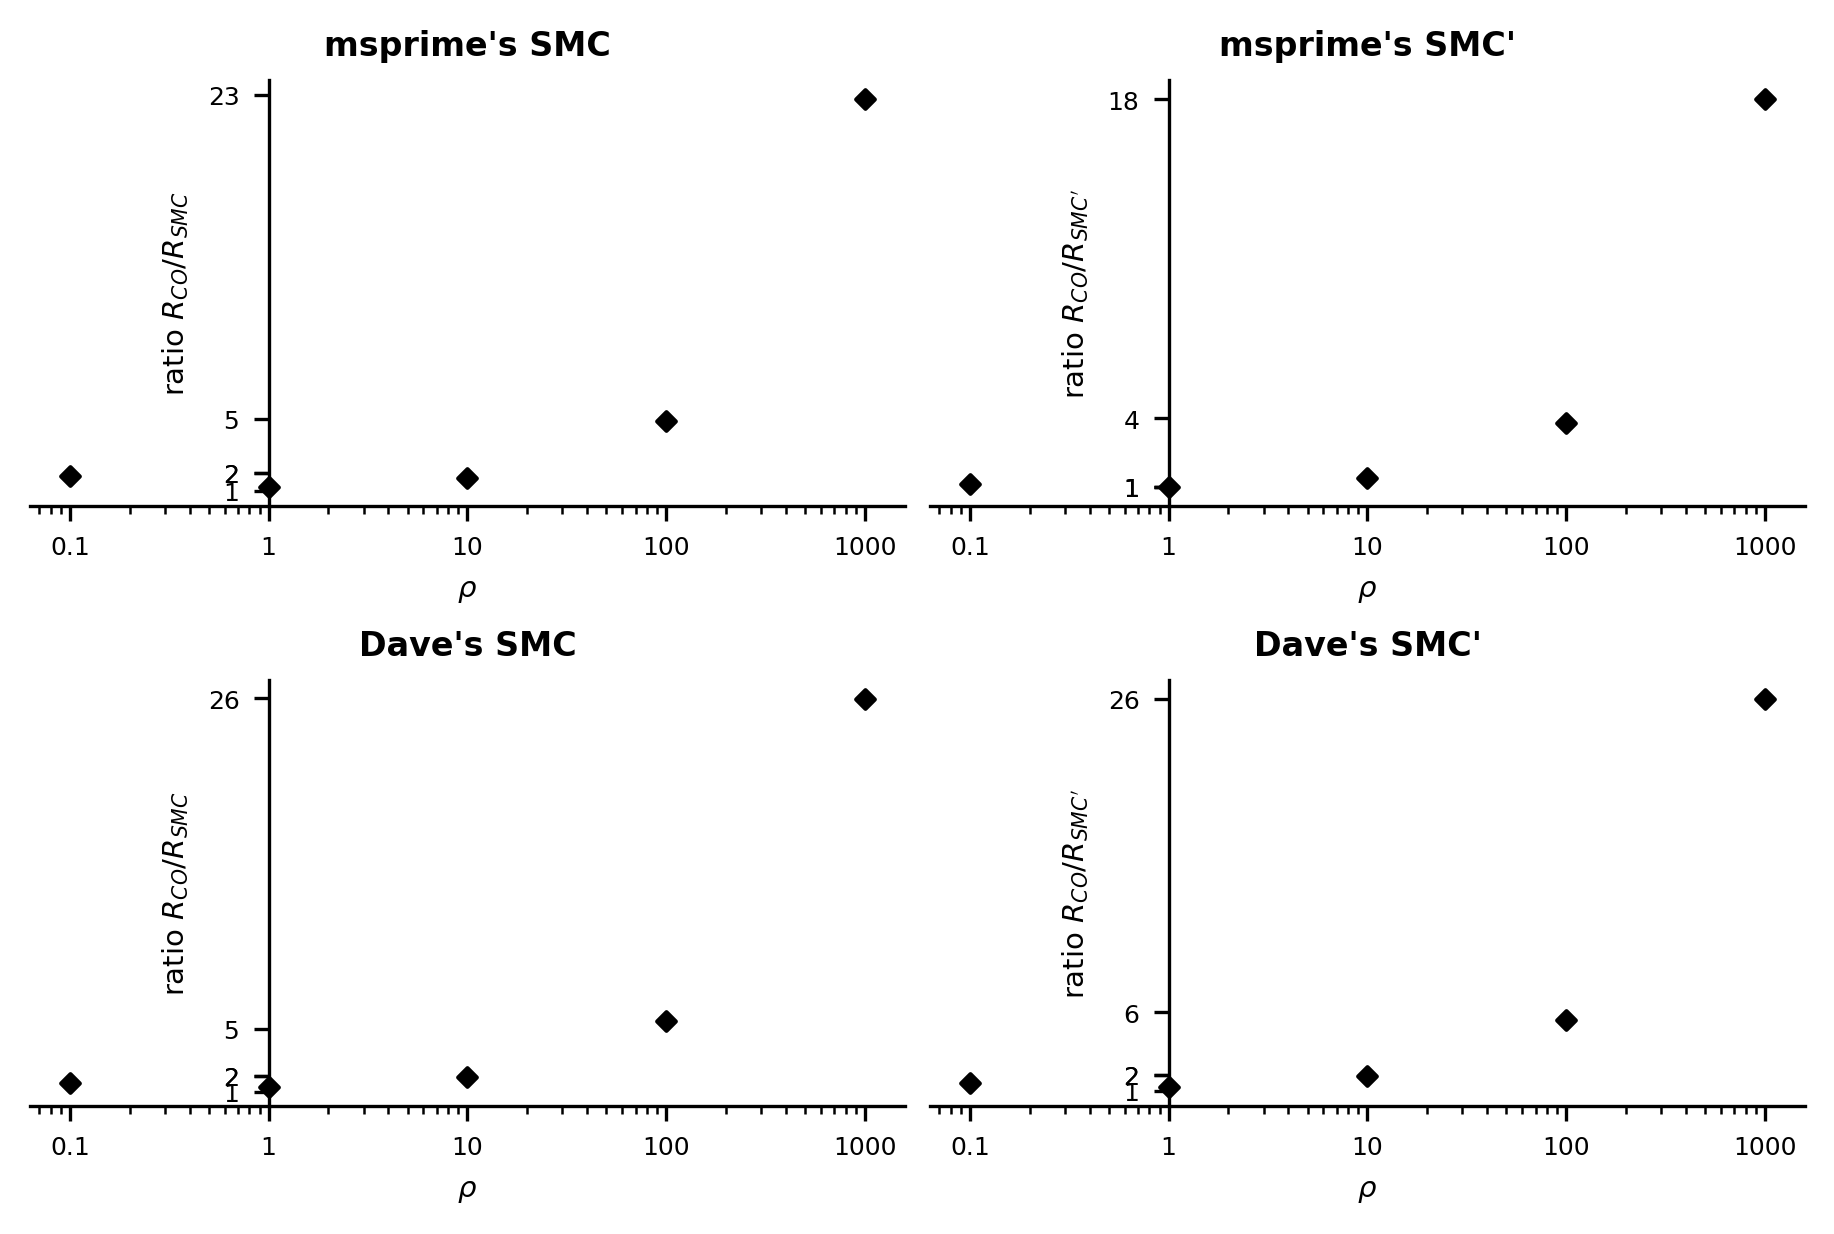

In [3]:
# Intialize figures and axes.
fig, axes = plt.subplots(
     2, 2, figsize=(6, 4),
    sharex=False, sharey=False, dpi=300,
)
# Intialize a dictionary for plotting.
plot_dicc = {
    'msp_smc': {'title': 'msprime\'s SMC', 'y_lab': r'ratio $R_{CO} / R_{SMC}$'},
    'msp_smc_prime': {'title': 'msprime\'s SMC\'', 'y_lab': r'''ratio $R_{CO} / R_{SMC'}$'''},
    'djp_smc': {'title': 'Dave\'s SMC', 'y_lab': r'ratio $R_{CO} / R_{SMC}$'},
    'djp_smc_prime': {'title': 'Dave\'s SMC\'', 'y_lab': r'''ratio $R_{CO} / R_{SMC'}$'''},
}
# Intialize axes list.
ax_list = [
    (0, 0), (0, 1),
    (1, 0), (1, 1),
]
# Intialize the mean number of crossovers for the standard coalescent.
standard_mean_co = recomb_dicc['standard'] / 1_000
# For every key.
for i, key in enumerate(plot_dicc):
    # Unpack the row and column indicies.
    row, col = ax_list[i]
    # Compute the R ratio.
    R_ratio = standard_mean_co / (recomb_dicc[key] / 1_000)
    # Plot the the results.
    axes[row, col].scatter(
        R_rhos, R_ratio, color='black',
        marker='D', s=10,
    )
    # Set the subplot title.
    axes[row, col].set_title(plot_dicc[key]['title'], fontweight='bold', size=8)
    # Set the axes labels.
    axes[row, col].set_xlabel(r'$\rho$', size=7)
    axes[row, col].set_ylabel(plot_dicc[key]['y_lab'], size=7)
    # Move the left spine (y-axis bar) to x = 1.
    axes[row, col].spines['left'].set_position(('data', 1))
    # Set the x-axis scale.
    axes[row, col].set_xscale('log')
    # Set the y-axis ticks and tick labels.
    axes[row, col].set_yticks(np.round(R_ratio))
    axes[row, col].set_yticklabels([str(round(ratio)) for ratio in R_ratio], size=6)
    # Set the axes scale, ticks, and tick labels.
    axes[row, col].set_xticks(R_rhos)
    axes[row, col].set_xticklabels([str(int(rho)) if rho.is_integer() else str(rho) for rho in R_rhos], size=6)
# Export the plot.
plt.savefig(
    './R_ratio_v04.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Show the plot.
plt.show()

In [4]:
# Intialize a data frame dictionary.
df_dicc = {}
# Intialize a list for column names.
col_names = [
    'msprime\'s Standard Coalescent $\hat{R_{CO}}$',
    r'''msprime's $\hat{R_{SMC}}$''', r'''msprime's $\hat{R_{SMC'}}$''',
    r'''Dave's $\hat{R_{SMC}}$''', r'''Dave's $\hat{R_{SMC'}}$''',
]
# For every key.
for i, key in enumerate(['standard', 'msp_smc', 'msp_smc_prime', 'djp_smc', 'djp_smc_prime']):
    # Compute the mean R.
    R_mean = (recomb_dicc[key] / 1_000)
    # Update the dictionary.
    df_dicc[col_names[i]] = np.round(R_mean, 3)
# Convert the dictionary to a data frame.
R_mean_df = pd.DataFrame(
    data=df_dicc,
    index=[r'$\rho =$ '+str(int(rho)) if rho.is_integer() else r'$\rho =$ '+str(rho) for rho in R_rhos],
)
# Export for good measures.
R_mean_df.to_csv('./R_mean_v04.csv', index=False)

In [5]:
# Show the mean R results.
R_mean_df

msprime's Standard Coalescent $\hat{R_{CO}}$  \
$\rho =$ 0.1                                          0.153   
$\rho =$ 1                                            1.288   
$\rho =$ 10                                          19.061   
$\rho =$ 100                                        548.257   
$\rho =$ 1000                                     25896.728   

               msprime's $\hat{R_{SMC}}$  msprime's $\hat{R_{SMC'}}$  \
$\rho =$ 0.1                       0.084                       0.136   
$\rho =$ 1                         1.047                       1.289   
$\rho =$ 10                       11.010                      13.751   
$\rho =$ 100                     112.284                     144.988   
$\rho =$ 1000                   1138.733                    1439.036   

               Dave's $\hat{R_{SMC}}$  Dave's $\hat{R_{SMC'}}$  
$\rho =$ 0.1                    0.100                    0.102  
$\rho =$ 1                      0.988                    1.039  
$\rho =$ 10                     9.806                    9.861  
$\rho =$ 100                  100.280                   99.247  
$\rho =$ 1000                 999.344                  997.816

### i$th$ Tree Height

In [5]:
# Intialize a dataframe dictionary.
df_height = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
df_width = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
df_ratio = {
    r'Sampled Lineages $(n)$': [],
    r'Population Recombination Rate $(\rho)$': [],
    r'$i$th Tree': [],
    'msprime Standard Coalescent': [],
    'msprime\'s SMC': [],
    'msprime\'s SMC\'': [],
    'Dave\'s SMC': [],
    'Dave\'s SMC\'': [],
}
# For every sample size.
for n in ns:
    # For every population recombination rate.
    for rho in ith_rhos:
        # For every tree index.
        for idx in tree_idx:
            # If the ith tree is not the last tree index.
            if idx != -1:
                # Add one to account for 0-indexing.
                ith = int(idx + 1)
            # Else.
            else:
                # Denote that this is the last tree.
                ith = 'last tree'
            # Update the dictionary with the simulation paramters and mean tree height.
            df_height[r'Sampled Lineages $(n)$'].append(n)
            df_height[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_height[r'$i$th Tree'].append(ith)
            df_height['msprime Standard Coalescent'].append(np.nanmean(np.array(height_dicc['standard'][n][rho][idx])))
            df_height['msprime\'s SMC'].append(np.nanmean(np.array(height_dicc['msp_smc'][n][rho][idx])))
            df_height['msprime\'s SMC\''].append(np.nanmean(np.array(height_dicc['msp_smc_prime'][n][rho][idx])))
            df_height['Dave\'s SMC'].append(np.nanmean(np.array(height_dicc['djp_smc'][n][rho][idx])))
            df_height['Dave\'s SMC\''].append(np.nanmean(np.array(height_dicc['djp_smc_prime'][n][rho][idx])))
            # Update the dictionary with the simulation paramters and mean tree width.
            df_width[r'Sampled Lineages $(n)$'].append(n)
            df_width[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_width[r'$i$th Tree'].append(ith)
            df_width['msprime Standard Coalescent'].append(np.nanmean(np.array(width_dicc['standard'][n][rho][idx])))
            df_width['msprime\'s SMC'].append(np.nanmean(np.array(width_dicc['msp_smc'][n][rho][idx])))
            df_width['msprime\'s SMC\''].append(np.nanmean(np.array(width_dicc['msp_smc_prime'][n][rho][idx])))
            df_width['Dave\'s SMC'].append(np.nanmean(np.array(width_dicc['djp_smc'][n][rho][idx])))
            df_width['Dave\'s SMC\''].append(np.nanmean(np.array(width_dicc['djp_smc_prime'][n][rho][idx])))
            # Update the dictionary with the simulation paramters and mean tree height:width.
            df_ratio[r'Sampled Lineages $(n)$'].append(n)
            df_ratio[r'Population Recombination Rate $(\rho)$'].append(rho)
            df_ratio[r'$i$th Tree'].append(ith)
            df_ratio['msprime Standard Coalescent'].append(np.nanmean(
                np.array(height_dicc['standard'][n][rho][idx]) / np.array(width_dicc['standard'][n][rho][idx])
            ))
            df_ratio['msprime\'s SMC'].append(np.nanmean(
                np.array(height_dicc['msp_smc'][n][rho][idx]) / np.array(width_dicc['msp_smc'][n][rho][idx])
            ))
            df_ratio['msprime\'s SMC\''].append(np.nanmean(
                np.array(height_dicc['msp_smc_prime'][n][rho][idx]) / np.array(width_dicc['msp_smc_prime'][n][rho][idx])
            ))
            df_ratio['Dave\'s SMC'].append(np.nanmean(
                np.array(height_dicc['djp_smc'][n][rho][idx]) / np.array(width_dicc['djp_smc'][n][rho][idx])
            ))
            df_ratio['Dave\'s SMC\''].append(np.nanmean(
                np.array(height_dicc['djp_smc_prime'][n][rho][idx]) / np.array(width_dicc['djp_smc_prime'][n][rho][idx])
            ))
# Convert the dictionaries to data frames.
height_df = pd.DataFrame(data=df_height)
width_df = pd.DataFrame(data=df_width)
height2width_ratio_df = pd.DataFrame(data=df_ratio)
# Export for good measures.
height_df.to_csv('./tree_height_n2.csv', index=False)
width_df.to_csv('./tree_width_n2.csv', index=False)
height2width_ratio_df.to_csv('./tree_height2width_ratio_n2.csv', index=False)

/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_46614/1318887569.py:50: RuntimeWarning: Mean of empty slice
  df_height['msprime Standard Coalescent'].append(np.nanmean(np.array(height_dicc['standard'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_46614/1318887569.py:59: RuntimeWarning: Mean of empty slice
  df_width['msprime Standard Coalescent'].append(np.nanmean(np.array(width_dicc['standard'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_46614/1318887569.py:68: RuntimeWarning: Mean of empty slice
  df_ratio['msprime Standard Coalescent'].append(np.nanmean(
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_46614/1318887569.py:52: RuntimeWarning: Mean of empty slice
  df_height['msprime\'s SMC\''].append(np.nanmean(np.array(height_dicc['msp_smc_prime'][n][rho][idx])))
/var/folders/nr/v5td4f0d4c52kd3_ynmvd7r40000gn/T/ipykernel_46614/1318887569.py:54: RuntimeWarning: Mean of empty slice
  df_height['Dave\'s S

In [6]:
height_df

Sampled Lineages $(n)$  Population Recombination Rate $(\rho)$ $i$th Tree  \
0                        2                                       1          1   
1                        2                                       1          2   
2                        2                                       1          3   
3                        2                                       1          4   
4                        2                                       1          5   
5                        2                                       1          6   
6                        2                                       1          7   
7                        2                                       1          8   
8                        2                                       1          9   
9                        2                                       1         10   
10                       2                                       1  last tree   
11                       2                                     100          1   
12                       2                                     100          2   
13                       2                                     100          3   
14                       2                                     100          4   
15                       2                                     100          5   
16                       2                                     100          6   
17                       2                                     100          7   
18                       2                                     100          8   
19                       2                                     100          9   
20                       2                                     100         10   
21                       2                                     100  last tree   
22                      20                                       1          1   
23                      20                                       1          2   
24                      20                                       1          3   
25                      20                                       1          4   
26                      20                                       1          5   
27                      20                                       1          6   
28                      20                                       1          7   
29                      20                                       1          8   
30                      20                                       1          9   
31                      20                                       1         10   
32                      20                                       1  last tree   
33                      20                                     100          1   
34                      20                                     100          2   
35                      20                                     100          3   
36                      20                                     100          4   
37                      20                                     100          5   
38                      20                                     100          6   
39                      20                                     100          7   
40                      20                                     100          8   
41                      20                                     100          9   
42                      20                                     100         10   
43                      20                                     100  last tree   

    msprime Standard Coalescent  msprime's SMC  msprime's SMC'  Dave's SMC  \
0                      2.013761       1.947391        1.978692    2.073717   
1                      3.324428       3.597176        3.414056    3.538698   
2                      4.116651       4.216949        4.036344    4.125788   
3                      4.298871       4.708407

In [7]:
width_df

Sampled Lineages $(n)$  Population Recombination Rate $(\rho)$ $i$th Tree  \
0                        2                                       1          1   
1                        2                                       1          2   
2                        2                                       1          3   
3                        2                                       1          4   
4                        2                                       1          5   
5                        2                                       1          6   
6                        2                                       1          7   
7                        2                                       1          8   
8                        2                                       1          9   
9                        2                                       1         10   
10                       2                                       1  last tree   
11                       2                                     100          1   
12                       2                                     100          2   
13                       2                                     100          3   
14                       2                                     100          4   
15                       2                                     100          5   
16                       2                                     100          6   
17                       2                                     100          7   
18                       2                                     100          8   
19                       2                                     100          9   
20                       2                                     100         10   
21                       2                                     100  last tree   
22                      20                                       1          1   
23                      20                                       1          2   
24                      20                                       1          3   
25                      20                                       1          4   
26                      20                                       1          5   
27                      20                                       1          6   
28                      20                                       1          7   
29                      20                                       1          8   
30                      20                                       1          9   
31                      20                                       1         10   
32                      20                                       1  last tree   
33                      20                                     100          1   
34                      20                                     100          2   
35                      20                                     100          3   
36                      20                                     100          4   
37                      20                                     100          5   
38                      20                                     100          6   
39                      20                                     100          7   
40                      20                                     100          8   
41                      20                                     100          9   
42                      20                                     100         10   
43                      20                                     100  last tree   

    msprime Standard Coalescent  msprime's SMC  msprime's SMC'  Dave's SMC  \
0                      0.769799       0.705281        0.756759    0.670026   
1                      0.444687       0.358794        0.426820    0.355955   
2                      0.286480       0.267098        0.266779    0.283342   
3                      0.241278       0.239099

In [8]:
height2width_ratio_df

Sampled Lineages $(n)$  Population Recombination Rate $(\rho)$ $i$th Tree  \
0                        2                                       1          1   
1                        2                                       1          2   
2                        2                                       1          3   
3                        2                                       1          4   
4                        2                                       1          5   
5                        2                                       1          6   
6                        2                                       1          7   
7                        2                                       1          8   
8                        2                                       1          9   
9                        2                                       1         10   
10                       2                                       1  last tree   
11                       2                                     100          1   
12                       2                                     100          2   
13                       2                                     100          3   
14                       2                                     100          4   
15                       2                                     100          5   
16                       2                                     100          6   
17                       2                                     100          7   
18                       2                                     100          8   
19                       2                                     100          9   
20                       2                                     100         10   
21                       2                                     100  last tree   
22                      20                                       1          1   
23                      20                                       1          2   
24                      20                                       1          3   
25                      20                                       1          4   
26                      20                                       1          5   
27                      20                                       1          6   
28                      20                                       1          7   
29                      20                                       1          8   
30                      20                                       1          9   
31                      20                                       1         10   
32                      20                                       1  last tree   
33                      20                                     100          1   
34                      20                                     100          2   
35                      20                                     100          3   
36                      20                                     100          4   
37                      20                                     100          5   
38                      20                                     100          6   
39                      20                                     100          7   
40                      20                                     100          8   
41                      20                                     100          9   
42                      20                                     100         10   
43                      20                                     100  last tree   

    msprime Standard Coalescent  msprime's SMC  msprime's SMC'    Dave's SMC  \
0                     14.621591     123.370384       18.650914     32.749831   
1                     40.860805      85.353162      103.029096     59.508402   
2                     62.226523      99.313027       80.712056     88.835837   
3                     91.425940      6

## `smclib.py` Code for Debugging

In [4]:
# Intialize a node class.
class Node:
    
    # Intialize the node.
    def __init__(self, node_id, age, node_type, parent=None, l_child=None, r_child=None):
        """
        Node Types
            - 0: leaf node
            - 1: coalescent event node
            - 2: visibile recombination
            - 3: hidden recombination
        """
        self.node_id = node_id
        self.age = age
        self.node_type = node_type
        self.parent = parent
        self.l_child = l_child
        self.r_child = r_child
        self.parent_dist = None
        self.l_child_dist = None
        self.r_child_dist = None
        
    # Define a deep copy method.
    def __deepcopy__(self, memo):
        """
        Return a deepy copy of an isntance of the Node class.
        """
        # Avoid infinite loops
        if id(self) in memo:
            return memo[id(self)]
        # Create a shallow copy of the current node
        copied_node = copy.copy(self)
        memo[id(self)] = copied_node
        # Deep copy children and parent
        copied_node.parent = copy.deepcopy(self.parent, memo)
        copied_node.l_child = copy.deepcopy(self.l_child, memo)
        copied_node.r_child = copy.deepcopy(self.r_child, memo)
        return copied_node
    
    # Define a method to check if a node is a leaf.
    def is_leaf(self):
        """
        True if the node is a leaf, False otherwise.
        """
        return self.node_type == 0
    
    # Define a method to compute the distance to the children.
    def dist_to_children(self):
        """
        Compute the distance from the current node to its children.
        """
        if self.l_child is not None:
            self.l_child_dist = self.age - self.l_child.age
        if self.r_child is not None:
            self.r_child_dist = self.age - self.r_child.age
    
    # Define a method to compute the distance to the parent node.
    def dist_to_parent(self):
        """
        Compute the distance from the current node to its parent.
        """
        if self.parent is not None:
            self.parent_dist = self.parent.age - self.age
            
    # Define a function to initialize distance to parent and children nodes.
    def init_dists(self):
        """
        Intialize the distances to the parent and children nodes.
        """
        self.dist_to_parent()
        self.dist_to_children()


# Intialize a tree class.
class Tree:
    
    # Intialize the tree.
    def __init__(self, left=0.0, right=1.0):
        self.left = left
        self.right = right
        self.root = None
        self.length = None
        self.next_node_id = None
        self.next_rec_id = -1
        self.nodes = {}
        self.edges = {}
        self.upper_bounds = None
        self.recomb_node = None
        self.coal_node = None
        
    def __deepcopy__(self, memo):
        """
        Return a deepy copy of an isntance of the Tree class.
        """
        # Avoid infinite loops.
        if id(self) in memo:
            return memo[id(self)]
        # Create a shallow copy of the tree.
        copied_tree    = copy.copy(self)
        memo[id(self)] = copied_tree
        # Deep copy nodes and edges.
        copied_tree.nodes = copy.deepcopy(self.nodes, memo)
        copied_tree.edges = copy.deepcopy(self.edges, memo)
        # Deep copy unary nodes.
        copied_tree.recomb_node = copy.deepcopy(self.recomb_node, memo)
        copied_tree.coal_node   = copy.deepcopy(self.coal_node, memo)
        return copied_tree
        
    # Define a method to add a node to the tree.
    def add_node(self, node):
        """
        Add a new node to the tree.
        """
        self.nodes[node.node_id] = node
        
    # Define a method to remove a node from the tree.
    def rmv_node(self, node):
        """
        Remove a new node to the tree.
        """
        del self.nodes[node.node_id]
    
    # Define a method to intialize node distances.
    def init_branch_lengths(self):
        """
        Intialize all the branch lengths for the current tree.
        """    
        # For every node.
        for node_id in self.nodes:
            # Intialize branch lengths.
            self.nodes[node_id].init_dists()
        
    # Define a method to intialize the edges on a tree.
    def init_edges(self):
        """
        Intialize all the edges on the current tree.
        """
        # Intialize variables.
        i = 0
        Lx = 0
        upper_bounds = []
        # For every node.
        for node in self.nodes:
            # If the node is not a leaf.
            if not self.nodes[node].is_leaf():
                # Record the interval's upper bound.
                upper_bounds.append(self.nodes[node].age)
                # Intialize the edge for parent -> left child.
                self.edges[i] = {}
                self.edges[i]['parent'] = self.nodes[node].node_id
                self.edges[i]['child'] = self.nodes[node].l_child.node_id
                self.edges[i]['upper'] = self.nodes[node].age
                self.edges[i]['lower'] = self.nodes[node].l_child.age
                self.edges[i]['length'] = self.nodes[node].l_child_dist
                i += 1
                Lx += self.nodes[node].l_child_dist
                # Intialize the edge for parent -> right child.
                self.edges[i] = {}
                self.edges[i]['parent'] = self.nodes[node].node_id
                self.edges[i]['child'] = self.nodes[node].r_child.node_id
                self.edges[i]['upper'] = self.nodes[node].age
                self.edges[i]['lower'] = self.nodes[node].r_child.age
                self.edges[i]['length'] = self.nodes[node].r_child_dist
                i += 1
                Lx += self.nodes[node].r_child_dist
        # Set the tree properties.
        self.upper_bounds = sorted(upper_bounds)
        self.length = Lx
                
    # Define a method to find the root node
    def find_root(self):
        """
        Determine the root node on the current tree.
        """
        root_node = max(self.nodes, key=lambda k: self.nodes[k].age)
        self.root = root_node
        
    # Define a method to reconcile the recoal and associated nodes.
    def perform_spr(self, broken_node, inherited_node, lonely_node, below_node, recoal_node, root_node):
        """
        Perform an SPR operation on the current tree.
        """
        # Intialize the new root.
        new_root = None
    
        ## [1] The broken and below nodes are the root node. ##
        if root_node.node_id == broken_node.node_id and root_node.node_id == below_node.node_id:
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, lonely node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = lonely_node
            # Point the children: {inherited node, lonely node} to the recoal node.
            inherited_node.parent = recoal_node
            lonely_node.parent    = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node
        
        
        ## [2] The broken node is the below node and the root node is unique. ##
        elif broken_node.node_id == below_node.node_id and broken_node.node_id != root_node.node_id:

            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the broken/below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, lonely node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = lonely_node
            # Point the children: {inherited node, lonely node} to the recoal node.
            inherited_node.parent = recoal_node
            lonely_node.parent    = recoal_node
        
        
        ## [3] The broken node is the root node and the below node is the lonely node. ##
        elif broken_node.node_id == root_node.node_id and below_node.node_id == lonely_node.node_id:

            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent     = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node
        
        
        ## [4] The broken node is the root node and the below and lonely nodes are unique. ##
        elif broken_node.node_id == root_node.node_id and below_node.node_id != lonely_node.node_id:

            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent     = recoal_node
            
            # Reconcile the lonely node. #
            # Set the lonely node as the new root.
            lonely_node.parent = None
            new_root = lonely_node
        
        
        ## [5] The below node is the root node and the broken node is unique. ##
        elif below_node.node_id == root_node.node_id and broken_node.node_id != root_node.node_id:
            
            # Reconcile the lonely node. #
            # Set the parent of the broken node as the new parent of the lonely node.
            lonely_node.parent = broken_node.parent
            # If the left child of the parent is the broken node.
            if lonely_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.l_child = lonely_node
            # Else the right child of is the broken node.
            else:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.r_child = lonely_node
            
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent     = recoal_node
            # Set recoal node as the new root.
            new_root = recoal_node
            
          
        ## [6] The broken node, below node, and root node are all unique, and the below node is the lonely node. ##
        elif broken_node.node_id != root_node.node_id and below_node.node_id == lonely_node.node_id:
            
            # Reconcile the recoal node's parent node. #
            # Set the parent of the broken node as the parent of the recoal node.
            recoal_node.parent = broken_node.parent
            # If the left child of the parent is the broken node.
            if recoal_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the broken node.
            else:
                # Replace the broken node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent     = recoal_node
            
        ## [7] All nodes are unique. ##
        else:
            
            # Reconcile the lonely node. #
            # Set the parent of the broken node as the parent of the lonely node.
            lonely_node.parent = broken_node.parent
            # If the left child of is the broken node.
            if lonely_node.parent.l_child.node_id == broken_node.node_id:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.l_child = lonely_node
            # Else the right child of the below node is the broken node.
            else:
                # Replace the broken node with the lonely node in the children set.
                lonely_node.parent.r_child = lonely_node
                
            # Reconcile the recoal node's parent node. #
            # Set the parent of the coal node as the parent of the recoal node.
            recoal_node.parent = self.coal_node.parent
            # If the left child of the parent is the below node.
            if recoal_node.parent.l_child.node_id == below_node.node_id:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.l_child = recoal_node
            # Else the right child of the parent is the below node.
            else:
                # Replace the below node with the recoal node in the children set.
                recoal_node.parent.r_child = recoal_node
            
            # Reconcile the recoal node. #
            # Point the recoal node to its children: {inherited node, below node}.
            recoal_node.l_child = inherited_node
            recoal_node.r_child = below_node
            # Point the children: {inherited node, below node} to the recoal node.
            inherited_node.parent = recoal_node
            below_node.parent     = recoal_node
        
        
        ## Tie up the new tree ##
        # Prune the broken node from the tree.
        self.rmv_node(broken_node)
        # Graft the recoal node to the tree.
        self.add_node(recoal_node)
        # Intialize branch lengths for the new tree.
        self.init_branch_lengths()
        # Intialize the edges for the new tree.
        self.init_edges()
        # Intialize the next node ids for the new tree.
        self.init_next_node_id()
        # If we already know the new root node.
        if new_root is not None:
            # Intialize the new root.
            self.root = new_root.node_id
        # Else, we do not know the root.
        else:
            # Intialize the new root.
            self.find_root()

    
    # Define a function to set the next node id.
    def init_next_node_id(self):
        """
        Set the next node id.
        """
        last_coal = self.coal_node
        max_node = max(self.nodes)
        if last_coal is not None:
            self.next_node_id = max([last_coal.node_id, max_node]) + 1
        else:
            self.next_node_id = max_node + 1
    
    # Define a method to recursively construct the newick information.
    def _to_newick_recursive(self, node):
        """
        Recursively construct the Newick information for a given node.
        """
        # Return the leaf id if the node is a leaf.
        if node.is_leaf():
            return f'{node.node_id}'
        # For internal nodes, get the newick information for each child.
        l_child_info = self._to_newick_recursive(node.l_child)
        r_child_info = self._to_newick_recursive(node.r_child)
        return '({}:{},{}:{})'.format(l_child_info, node.l_child_dist, 
                                      r_child_info, node.r_child_dist)
    
    # Define a method to export a tree in newick format.
    def to_newick(self):
        """
        Convert the tree to its Newick format.
        """
        # Start the conversion from the root.
        nwk = self._to_newick_recursive(self.nodes[self.root])
        # The Newick format ends with a semicolon.
        return nwk + ';'

In [6]:
# Define a function to intialize a tree from a msprime simulaion.
def init_msp_tree(k, Ne, ploidy, seed=None):
    """
    Returns a Tree object from a msprime simulation.
    
    k      -- Number of chromosomes to simulate.
    Ne     -- Effective population size.
    ploidy -- Haploid or diploid coalescent units.
    seed   -- Random seed for reporducibility.
    """
    # Simulate a tree under the standard coalescent.
    ts = msprime.sim_ancestry(
        samples=[msprime.SampleSet(k, ploidy=1)],
        population_size=Ne,
        ploidy=ploidy,
        random_seed=seed,
        discrete_genome=False,
    )
    # Intialize the current tree.
    tree = Tree()
    # For ever node.
    for node_id, age in enumerate(ts.tables.nodes.time):
        # If the node is a leaf.
        if age == 0:
            # Intialize the node.
            node = Node(
                node_id=node_id, age=(age / (Ne * ploidy)), node_type=0,
                parent=None, l_child=None, r_child=None,
            )
            # Add the node to the tree.
            tree.add_node(node)
        # Else, the node is an ancestral node.
        else:
            # Intialize the node.
            node = Node(
                node_id=node_id, age=(age / (Ne * ploidy)), node_type=1,
                parent=None, l_child=None, r_child=None,
            )
            # Add the node to the tree.
            tree.add_node(node)
    # For every parent node.
    for parent in np.unique(ts.tables.edges.parent):
        # Find the children of the parent node.
        left_child, right_child = ts.tables.edges[ts.tables.edges.parent == parent].child
        # Update the parent node for the two children.
        tree.nodes[left_child].parent = tree.nodes[parent]
        tree.nodes[right_child].parent = tree.nodes[parent]
        # Update the children nodes for the parent.
        tree.nodes[parent].l_child = tree.nodes[left_child]
        tree.nodes[parent].r_child = tree.nodes[right_child]
    # Intialize branch lengths.
    tree.init_branch_lengths()
    # Intialize the edges for the current tree.
    tree.init_edges()
    # Intialize the root node.
    tree.find_root()
    # Intialize the next node id.
    tree.init_next_node_id()
    # Make a copy of the tree-seq tables for editting.
    ts_tables = ts.dump_tables()
    return tree, ts, ts_tables

# Define a function to determine the distance to the next recombination event.
def draw_y(rho, Lx, ploidy):
    """
    Returns the distance to the next recombination event.
    
    rho    -- Population recombination rate.
    Lx     -- Total branch length of T_{x}.
    ploidy -- Haploid or diploid coalescent units.
    """
    # # Convert the total branch length from generations
    # # to coalescent units.
    # Lx = Lx / ploidy
    print(f'total branch length: {Lx}')
    print(f'breakpoint scale paramter (ploidy / (rho * Lx)): {(ploidy / (rho * Lx))}')
    # Draw y.
    y = np.random.exponential((ploidy / (rho * Lx)))
    return y

# Define a function to determine the the lineage and age of the recombination event.
def draw_g(tree):
    """
    Returns the recombination event information for the current tree.
    
    tree -- An instance of the current tree.
    """
    # Compute the edge weights (ie edge_length/L(x)).
    edge_weights = [(tree.edges[key]['length'] / tree.length) for key in tree.edges.keys()]
    # Determine which edge will have the recombinatin event.
    rec_edge_key = np.random.choice(list(tree.edges.keys()), p=edge_weights)
    # Determine the age of the recombination event.
    g = np.random.uniform(tree.edges[rec_edge_key]['lower'], tree.edges[rec_edge_key]['upper'])
    return rec_edge_key, g

# Define a function to determine the lineage and age of the next coalescent event for the smc model.
def draw_coal_smc(tree, rec_edge_key, g, Ne, ploidy):
    """
    Returns the edge and coalescent information for the next tree.
    
    tree              -- An instance of the current tree
    rec_edge_key      -- Key of the edge with the recombination event in tree.edges.
    g                 -- Age of the recombination event on the current tree.
    Ne                -- Effective population size.
    ploidy            -- Haploid or diploid coalescent units.
    """
    # Intialize the lower bound of the first interval.
    c_lower_bound = 0
    # Intialize the key of the edge where the coalescent event will occur.
    coal_edge_key = None
    # For every possible coalescent interval.
    for i, c_upper_bound in enumerate(tree.upper_bounds):

        print(f'trying to find the re-coalesences event in the interval: {c_lower_bound} - {c_upper_bound}')

        # Determine if the recombination event occurs below the upper bound of the current interval.
        if c_upper_bound > g:
            # Determine the avaiable lineages in this interval.
            available_lineages = [
                key for key in tree.edges.keys() if\
                ((tree.edges[key]['upper'] >= c_upper_bound)\
                & (tree.edges[key]['lower'] <= c_lower_bound)\
                & (key != rec_edge_key))
            ]

            print(f'lineages in the interval ({c_lower_bound} - {c_upper_bound}): {available_lineages}')

            # If there are avaiable lineages.
            if len(available_lineages) > 0:

                print(f'there are {len(available_lineages)} lineages avaiable in the interval ({c_lower_bound} - {c_upper_bound})')
                print(f'the rate of coalesnces is {((Ne * ploidy) / len(available_lineages))} during the interval ({c_lower_bound} - {c_upper_bound})')
                
                # Determine the time of the coalescent event.
                coal_time = g + np.random.exponential(((Ne * ploidy) / len(available_lineages)))
            # Else set the coalescent event to a variable that will fail.
            else:
                coal_time = -1
            # If the the coalescent event occurs within the current time interval.
            if c_upper_bound > coal_time > c_lower_bound:
                # Determine which edge the coalescent event occurs on.
                coal_edge_key = np.random.choice(available_lineages)

                print(f're-coalesences event occurs at {coal_time} on edge {coal_edge_key} during the interval ({c_lower_bound} - {c_upper_bound})')
                
                break
            # Else, re-intialize the lower bound and move on to the next interval.
            else:
                c_lower_bound = c_upper_bound
        # Else, re-intialize the lower bound and move on to the next interval.
        else:
            c_lower_bound = c_upper_bound
    # If an edge was not found within the current tree's interval.
    if coal_edge_key == None:
        # Determine the new time of coalescences above the root.
        coal_time = tree.nodes[tree.root].age + np.random.exponential((Ne * ploidy))

        print(f're-coalesences event occurs above the current root at {coal_time})')

    return coal_edge_key, coal_time

# Define a function to determine the lineage and age of the next coalescent event for the smc' model.
def draw_coal_smc_prime(tree, g, Ne, ploidy):
    """
    Returns the edge and coalescent information for the next tree.
    
    tree   -- An instance of the current tree
    g      -- Age of the recombination event on the current tree.
    Ne     -- Effective population size.
    ploidy -- Haploid or diploid coalescent units.
    """
    # Intialize the lower bound of the first interval.
    c_lower_bound = 0
    # Intialize the key of the edge where the coalescent event will occur.
    coal_edge_key = None
    # For every possible coalescent interval.
    for i, c_upper_bound in enumerate(tree.upper_bounds):

        print(f'trying to find the re-coalesences event in the interval: {c_lower_bound} - {c_upper_bound}')
        
        # Determine if the recombination event occurs below the upper bound of the current interval.
        if c_upper_bound > g:
            # Determine the avaiable lineages in this interval.
            available_lineages = [
                key for key in tree.edges.keys() if\
                ((tree.edges[key]['upper'] >= c_upper_bound) & (tree.edges[key]['lower'] <= c_lower_bound))
            ] ### YOU CAN ADD THE CONDITION (key != rec_edge_key) FOR SMC ###

            print(f'lineages in the interval ({c_lower_bound} - {c_upper_bound}): {available_lineages}')
            
            # If there are avaiable lineages.
            if len(available_lineages) > 0:

                print(f'there are {len(available_lineages)} lineages avaiable in the interval ({c_lower_bound} - {c_upper_bound})')
                print(f'the rate of coalesnces is {((Ne * ploidy) / len(available_lineages))} during the interval ({c_lower_bound} - {c_upper_bound})')
                
                # Determine the time of the coalescent event.
                coal_time = g + np.random.exponential(((Ne * ploidy) / len(available_lineages)))
            # Else set the coalescent event to a variable that will fail.
            else:
                coal_time = -1
            # If the the coalescent event occurs within the current time interval.
            if c_upper_bound > coal_time > c_lower_bound:
                # Determine which edge the coalescent event occurs on.
                coal_edge_key = np.random.choice(available_lineages)

                print(f're-coalesences event occurs at {coal_time} on edge {coal_edge_key} during the interval ({c_lower_bound} - {c_upper_bound})')
                
                break
            # Else, re-intialize the lower bound and move on to the next interval.
            else:
                c_lower_bound = c_upper_bound
        # Else, re-intialize the lower bound and move on to the next interval.
        else:
            c_lower_bound = c_upper_bound
    # If an edge was not found within the current tree's interval.
    if coal_edge_key == None:
        # Determine the new time of coalescences above the root.
        coal_time = tree.nodes[tree.root].age + np.random.exponential((Ne * ploidy))

        print(f're-coalesences event occurs above the current root at {coal_time})')

    return coal_edge_key, coal_time

In [11]:
## (0) Intialize the inputs for the the SMC/SMC' algorithim. ###

k = 2
Ne = 1
rho = 1
ploidy = 2
seed = None

## (1) Intialize the first tree, T(x)=T_{0}, at position x=0, and compute the total branch length L(x)=L_{0}. ##

# Intialize a tree-sequence dictionary.
ts_dicc = {}
# Intialize the first tree index.
tree_idx = 0
# Intialize the start position.
x = 0
# Simulate a tree (T_{0}) under the standard coalescent at point x=0.
c_tree, ts, ts_tables = init_msp_tree(k=k, Ne=Ne, ploidy=ploidy, seed=seed)

print(ts.draw_text())

## (2) Generate the distance, y=exp[(rho/2)L(x)], to the next recombination event. ##

# Compute the distance to the next recombination event (y).
y = draw_y(rho=rho, Lx=c_tree.length, ploidy=ploidy)

print(f'first interval: [{x}, {y})')

# While we are still within the sequence intervals.
while (x + y) < 1:
    # Intialize the new right position
    c_tree.right = (x + y)
    
## (3) Determine the location (ie what edge), and the age of the recombination event (g). ##

    # Determine g and its location on the current tree.
    rec_edge_key, g = draw_g(tree=c_tree)
        
    print(f'recombination event age: {g}')
    print('recombination edge:')
    print(c_tree.edges[rec_edge_key])
    print('\n')
    
## (4) Overlay the recombination event at time g and allow the branch below g to coalesce elsewhere on the tree. ##

    print('--------------------------------------------------------------------------------')
    print('***SMC DRAW RECOALESCENCES***')
    print('\n')

    # Deteremine the location and time of the recombining coalescent event.
    coal_edge_key, coal_time = draw_coal_smc(tree=c_tree, rec_edge_key=rec_edge_key, g=g, Ne=Ne, ploidy=ploidy)

    print(f'recombination event age: {g}; re-coalesence age: {coal_time}')
    if coal_edge_key is None:
        print(f're-coalesence is above the root node (ie, node id: {c_tree.root})')
    else:
        print('re-coalesence edge:')
        print(c_tree.edges[coal_edge_key])
    print('\n')

    print('--------------------------------------------------------------------------------')
    print('***SMC\' DRAW RECOALESCENCES***')
    print('\n')
    
    # Deteremine the location and time of the recombining coalescent event.
    coal_edge_key, coal_time = draw_coal_smc_prime(tree=c_tree, g=g, Ne=Ne, ploidy=ploidy)
    
    print(f'recombination event age: {g}; re-coalesence age: {coal_time}')
    if coal_edge_key is None:
        print(f're-coalesence is above the root node (ie, node id: {c_tree.root})')
    else:
        print('re-coalesence edge:')
        print(c_tree.edges[coal_edge_key])
    print('--------------------------------------------------------------------------------')
    print('\n')
        
## (5) Prune the old branch above g and graft the new branch to construct the next tree at position x+y. ##
    
    ### HIDDEN RECOMBINATION SCENARIO ###
    
    # If the coalescent event is hidden (ie recombination and coalesence occur on the same branch).
    if rec_edge_key == coal_edge_key:
        
        print('hidden recombination event')
        
        # Intialize a recombination event node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        recomb_node = Node(
            node_id=c_tree.next_rec_id, age=g, node_type=3,
            parent=c_tree.nodes[c_tree.edges[rec_edge_key]['parent']],
            l_child=c_tree.nodes[c_tree.edges[rec_edge_key]['child']], r_child=None,
        )
        # Intialize the coal node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        coal_node = Node(
            node_id=c_tree.next_node_id, age=coal_time, node_type=1,
            parent=c_tree.nodes[c_tree.edges[coal_edge_key]['parent']],
            l_child=c_tree.nodes[c_tree.edges[coal_edge_key]['child']], r_child=None,
        )
        # Move the the recombination event node counter back.
        c_tree.next_rec_id -= 1
        # Move the coalescent event node counter forward.
        c_tree.next_node_id += 1
        # Record the recombination event.
        c_tree.recomb_node = recomb_node
        # Record the re-coalesence event.
        c_tree.coal_node = coal_node
        # Add the current tree to the tree-sequence dictionary.
        ts_dicc[tree_idx] = c_tree
        # Move the tree index forward.
        tree_idx += 1
        # Intialize the next tree by copying the current tree.
        n_tree       = copy.deepcopy(c_tree)
        n_tree.left  = (x + y)
        n_tree.right = 1.0
    # Else, the coalescent event is not hidden.
    else:
        
        ### Perform the SPR Algorithim ###
        
        # Intialize unary nodes—ie the recomb and coal nodes. #
        
        # Intialize a recombination event node for the current tree.
        # Note this is purely for bookkeeping purposes for future conversion to a gARG.
        recomb_node = Node(
            node_id=c_tree.next_rec_id, age=g, node_type=2,
            parent=c_tree.nodes[c_tree.edges[rec_edge_key]['parent']],
            l_child=c_tree.nodes[c_tree.edges[rec_edge_key]['child']], r_child=None,
        )
        # Move the the recombination event node counter back.
        c_tree.next_rec_id -= 1
        # Record the recombination event.
        c_tree.recomb_node = recomb_node
        # If the re-coalescence event is above the root.
        if coal_edge_key == None:
            # Intialize the next node id.
            next_id = c_tree.next_node_id
            # Intialize the coal node for the current tree.
            # Note this is purely for bookkeeping purposes for future conversion to a gARG.
            coal_node = Node(
                node_id=next_id, age=coal_time, node_type=1,
                parent=None, l_child=c_tree.nodes[c_tree.root], r_child=None,
            )
            # Record the coal node on the current tree.
            c_tree.coal_node = coal_node
            # Add the current tree to the tree-sequence dictionary.
            ts_dicc[tree_idx] = c_tree
            # Move the tree index forward.
            tree_idx += 1
            # Intialize the next tree by copying the current tree.
            n_tree       = copy.deepcopy(c_tree)
            n_tree.left  = (x + y)
            n_tree.right = 1.0
        # Else the re-coalescence event is on an existing edge.
        else:
            # Intialize the next node id.
            next_id = c_tree.next_node_id
            # Intialize the coal node for the current tree.
            # Note this is purely for bookkeeping purposes for future conversion to a gARG.
            coal_node = Node(
                node_id=next_id, age=coal_time, node_type=1,
                parent=c_tree.nodes[c_tree.edges[coal_edge_key]['parent']],
                l_child=c_tree.nodes[c_tree.edges[coal_edge_key]['child']], r_child=None,
            )
            # Record the coal node on the current tree.
            c_tree.coal_node = coal_node
            # Add the current tree to the tree-sequence dictionary.
            ts_dicc[tree_idx] = c_tree
            # Move the tree index forward.
            tree_idx += 1
            # Intialize the next tree by copying the current tree.
            n_tree       = copy.deepcopy(c_tree)
            n_tree.left  = (x + y)
            n_tree.right = 1.0
        
        # Intialize nodes of interest. #
        broken_node    = n_tree.recomb_node.parent
        inherited_node = n_tree.recomb_node.l_child
        lonely_node    = broken_node.r_child if broken_node.l_child == inherited_node else broken_node.l_child
        below_node     = n_tree.coal_node.l_child
        root_node      = n_tree.nodes[n_tree.root]
        # Intialize the re-coalesence event node to create the next tree.
        recoal_node = Node(
            node_id=next_id, age=coal_time, node_type=1,
            parent=None, l_child=None, r_child=None,
        )
        
        print(f'broken node: {broken_node.node_id}')
        print(f'inherited node: {inherited_node.node_id}')
        print(f'lonely node {lonely_node.node_id}')
        print(f'below node: {below_node.node_id}')
        print(f'root node: {root_node.node_id}')
        
        ## [1] The broken and below nodes are the root node. ##
        if root_node.node_id == broken_node.node_id and root_node.node_id == below_node.node_id:
            
            print('spr scenario 1')
            
        ## [2] The broken node is the below node and the root node is unique. ##
        elif broken_node.node_id == below_node.node_id and broken_node.node_id != root_node.node_id:
            
            print('spr scenario 2')
        
        ## [3] The broken node is the root node and the below node is the lonely node. ##
        elif broken_node.node_id == root_node.node_id and below_node.node_id == lonely_node.node_id:
            
            print('spr scenario 3')
        
        ## [4] The broken node is the root node and the below and lonely nodes are unique. ##
        elif broken_node.node_id == root_node.node_id and below_node.node_id != lonely_node.node_id:
            
            print('spr scenario 4')
        
         ## [5] The below node is the root node and the broken node is unique. ##
        elif below_node.node_id == root_node.node_id and broken_node.node_id != root_node.node_id:
            
            print('spr scenario 5')
        
        ## [6] The broken node, below node, and root node are all unique, and the below node is the lonely node. ##
        elif broken_node.node_id != root_node.node_id and below_node.node_id == lonely_node.node_id:
            
            print('spr scenario 6')
        
        ## [7] All nodes are unique. ##
        else:
            
            print('spr scenario 7')
        
        ## Reconcile the new tree! ##
        n_tree.perform_spr(
            broken_node=broken_node, inherited_node=inherited_node, lonely_node=lonely_node,
            below_node=below_node, recoal_node=recoal_node, root_node=root_node,
        )

        
    # Set the new tree as the current tree.
    c_tree = n_tree
        
## (6) Reset the new interval x=x+y, intialize the new tree as the current tree T(x), and compute the compute the total branch length L(x). ##
    
    # Reset the new left interval (x).
    x = (x + y)
    # Compute the distance to the next recombination event (y).
    y = draw_y(rho=rho, Lx=c_tree.length, ploidy=ploidy)
    
    print(f'distance to the next brakepoint: {y}')
    print('--------------------------------------------------------------------------------')
    print('\n')
    print(f'next interval: [{x}, {x + y})')

# Remove the recombination an re-coalescence nodes from the last tree,
# that did not expirence recombination.
# JAZ: Explain, please.
# DAVE: The recomb node and recoal node attributes of the tree are bookkeeping information
# need to create the next tree from the current tree. Since we broke the loop that means the
# the current tree is the last tree, ie there is no recombination or re-coalescent event information
# for the last tree since there is no tree after it.
c_tree.recomb_node = None
c_tree.recoal_node = None

print(f'last interval: [{c_tree.left}, {c_tree.right})')

# Add the last tree to the tree-sequence.
# JAZ: Should this be n_tree?
# DAVE: No, since we broke the while loop that means the current tree (after the previous SPR) is the
# last tree in the tree-sequence.
ts_dicc[tree_idx] = c_tree

0.95┊  2  ┊
    ┊ ┏┻┓ ┊
0.00┊ 0 1 ┊
    0     1

total branch length: 0.9498128063196205
breakpoint scale paramter (ploidy / (rho * Lx)): 2.105678073292878
first interval: [0, 0.669703641424833)
recombination event age: 0.39980492843149584
recombination edge:
{'parent': 2, 'child': 1, 'upper': 0.47490640315981025, 'lower': 0.0, 'length': 0.47490640315981025}


--------------------------------------------------------------------------------
***SMC DRAW RECOALESCENCES***


trying to find the re-coalesences event in the interval: 0 - 0.47490640315981025
lineages in the interval (0 - 0.47490640315981025): [0]
there are 1 lineages avaiable in the interval (0 - 0.47490640315981025)
the rate of coalesnces is 2.0 during the interval (0 - 0.47490640315981025)
re-coalesences event occurs above the current root at 1.7989094704545292)
recombination event age: 0.39980492843149584; re-coalesence age: 1.7989094704545292
re-coalesence is above the root node (ie, node id: 2)


-------------------------

In [9]:
print(f'there are {len(ts_dicc)} trees in the tree-sequence')
print('\n')
for tree in ts_dicc:
    print(f'tree: {tree}')
    print(f'[left, right): [{ts_dicc[tree].left}, {ts_dicc[tree].right})')
    if (ts_dicc[tree].recomb_node is not None) & (ts_dicc[tree].coal_node is not None):
        recomb_info = []
        recomb_info.append(ts_dicc[tree].recomb_node.node_id)
        recomb_info.append(ts_dicc[tree].recomb_node.age)
        recomb_info.append(ts_dicc[tree].recomb_node.parent.node_id)
        recomb_info.append(ts_dicc[tree].recomb_node.l_child.node_id)
        coal_info = []
        coal_info.append(ts_dicc[tree].coal_node.node_id)
        coal_info.append(ts_dicc[tree].coal_node.age)
        if ts_dicc[tree].coal_node.parent is not None:
            coal_info.append(ts_dicc[tree].coal_node.parent.node_id)
        else:
            coal_info.append(ts_dicc[tree].root)
        coal_info.append(ts_dicc[tree].coal_node.l_child.node_id)
        print(f'recomb event id: {recomb_info[0]}, age: {recomb_info[1]}, parent: {recomb_info[2]}, child: {recomb_info[3]}')
        print(f'coal event id: {coal_info[0]}, age: {coal_info[1]}, parent: {coal_info[2]}, child: {coal_info[3]}')
    for node in ts_dicc[tree].nodes:
        if ts_dicc[tree].nodes[node].is_leaf():
            print(f'leaf: {ts_dicc[tree].nodes[node].node_id}, parent: {ts_dicc[tree].nodes[node].parent.node_id}')
        else:
            print(f'{ts_dicc[tree].nodes[node].node_id}: ({ts_dicc[tree].nodes[node].l_child.node_id}, {ts_dicc[tree].nodes[node].r_child.node_id})')
    for edge in ts_dicc[tree].edges:
        print(ts_dicc[tree].edges[edge])
    print('\n')

there are 2 trees in the tree-sequence


tree: 0
[left, right): [0.0, 0.7230899919332465)
recomb event id: -1, age: 0.13897362639377506, parent: 3, child: 1
coal event id: 5, age: 0.5428768490194178, parent: 4, child: 2
leaf: 0, parent: 3
leaf: 1, parent: 3
leaf: 2, parent: 4
3: (0, 1)
4: (2, 3)
{'parent': 3, 'child': 0, 'upper': 0.3128453884812263, 'lower': 0.0, 'length': 0.3128453884812263}
{'parent': 3, 'child': 1, 'upper': 0.3128453884812263, 'lower': 0.0, 'length': 0.3128453884812263}
{'parent': 4, 'child': 2, 'upper': 0.7181423917434264, 'lower': 0.0, 'length': 0.7181423917434264}
{'parent': 4, 'child': 3, 'upper': 0.7181423917434264, 'lower': 0.3128453884812263, 'length': 0.40529700326220014}


tree: 1
[left, right): [0.7230899919332465, 1.0)
leaf: 0, parent: 4
leaf: 1, parent: 5
leaf: 2, parent: 5
4: (5, 0)
5: (1, 2)
{'parent': 4, 'child': 5, 'upper': 0.7181423917434264, 'lower': 0.5428768490194178, 'length': 0.17526554272400863}
{'parent': 4, 'child': 0, 'upper': 0.71814239174